Constructed Dependency Graphs and plotted graphs to show semantic connections

In [1]:
import spacy
from spacy import displacy
# Load the language model
nlp = spacy.load("en_core_web_lg")

In [2]:
sentence = 'that would be very easy'

# nlp function returns an object with individual token information, 
# linguistic features and relationships
doc = nlp(sentence)

print ("{:<15} | {:<8} | {:<15} | {:<20}".format('Token','Relation','Head', 'Children'))
print ("-" * 70)

for token in doc:
  # Print the token, dependency nature, head and all dependents of the token
  print ("{:<15} | {:<8} | {:<15} | {:<20}"
         .format(str(token.text), str(token.dep_), str(token.head.text), str([child for child in token.children])))
  
 # Use displayCy to visualize the dependency 
displacy.render(doc, style='dep', jupyter=True, options={'distance': 120})

Token           | Relation | Head            | Children            
----------------------------------------------------------------------
that            | nsubj    | be              | []                  
would           | aux      | be              | []                  
be              | ROOT     | be              | [that, would, easy] 
very            | advmod   | easy            | []                  
easy            | acomp    | be              | [very]              


In [3]:
import networkx as nx
from matplotlib import pyplot as plt

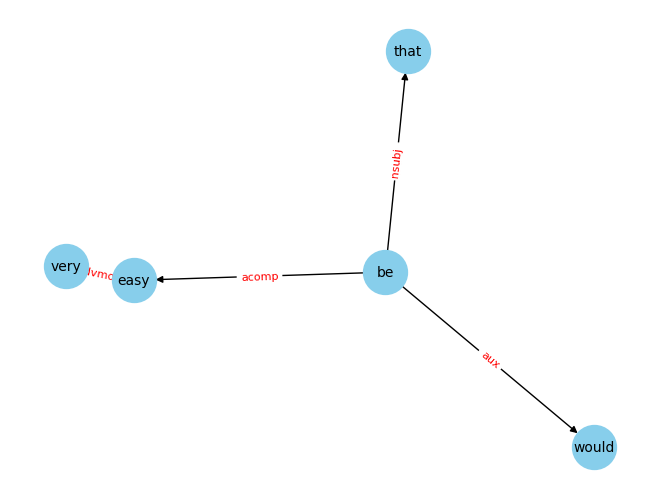

In [4]:
sentence = 'that would be very easy'

# nlp function returns an object with individual token information, 
# linguistic features and relationships
doc = nlp(sentence)

# Create a directed graph using networkx
G = nx.DiGraph()

# Add nodes for each token in the sentence
for token in doc:
    G.add_node(token.i, label=token.text, dep=token.dep_)

# Add edges for dependency relationships
for token in doc:
    if token.dep_ != "ROOT":  # Skip the root node
        G.add_edge(token.head.i, token.i, rel=token.dep_)

# Draw the graph
pos = nx.spring_layout(G, seed=42)  # Position nodes using spring layout
labels = {i: data["label"] for i, data in G.nodes(data=True)}
edge_labels = {(u, v): data["rel"] for u, v, data in G.edges(data=True)}

nx.draw(G, pos, with_labels=True, labels=labels, font_size=10, node_size=1000, node_color='skyblue', font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8, font_color='red')

plt.show()

C:\Users\siddh\AppData\Local\Temp\ipykernel_19584\1568967067.py:39: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos)


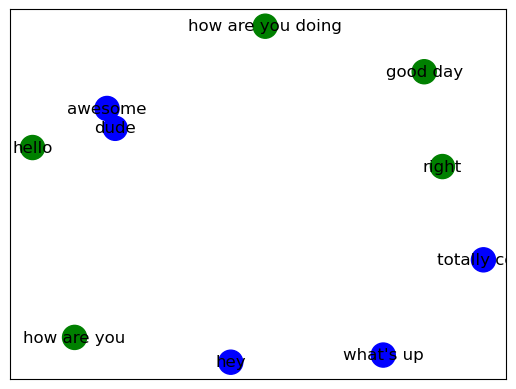

In [8]:
# Sample data
sentences = [
    "Hey, what's up?",
    "Hello, how are you?",
    "Dude, that's awesome!",
    "Good day, how are you doing?",
    "Totally cool, right?"
]

# Define informal and formal phrases
informal_phrases = ["hey", "what's up", "dude", "awesome", "totally cool"]
formal_phrases = ["hello", "how are you", "good day", "how are you doing", "right"]

# Create a graph
G = nx.Graph()

# Add informal and formal nodes
for phrase in informal_phrases:
    G.add_node(phrase, formality="informal")

for phrase in formal_phrases:
    G.add_node(phrase, formality="formal")

# Analyze co-occurrences and add edges
for sentence in sentences:
    doc = nlp(sentence)
    words = [token.text.lower() for token in doc if token.is_alpha]
    
    for i in range(len(words)):
        if words[i] in G.nodes:
            for j in range(i + 1, len(words)):
                if words[j] in G.nodes and words[i] != words[j]:
                    G.add_edge(words[i], words[j])

# Draw the graph
pos = nx.spring_layout(G)
node_colors = ["blue" if G.nodes[node]["formality"] == "informal" else "green" for node in G.nodes]
nx.draw_networkx_nodes(G, pos, node_color=node_colors)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

plt.show()